In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#파마 인디언 당뇨병 데이터넷을 불러옵니다.
df = pd.read_csv('../data/pima-indians-diabetes3.csv')

In [3]:
df.head(5)

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df['diabetes'].value_counts()

diabetes
0    500
1    268
Name: count, dtype: int64

In [5]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
colormap = plt.cm.gist_heat
plt.figure(figsize=(12,12))

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

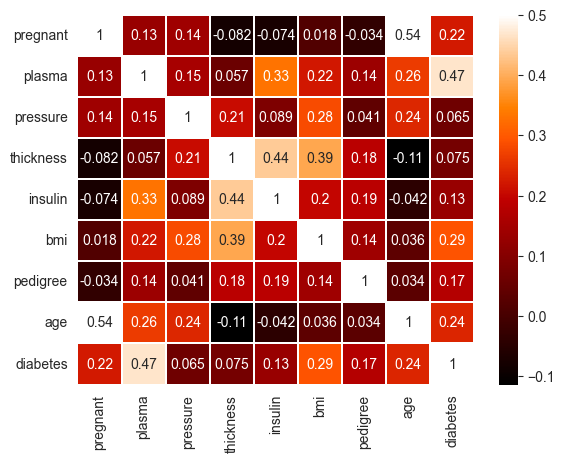

In [8]:
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5,cmap=colormap,
linecolor = 'white',annot=True)
plt.show()


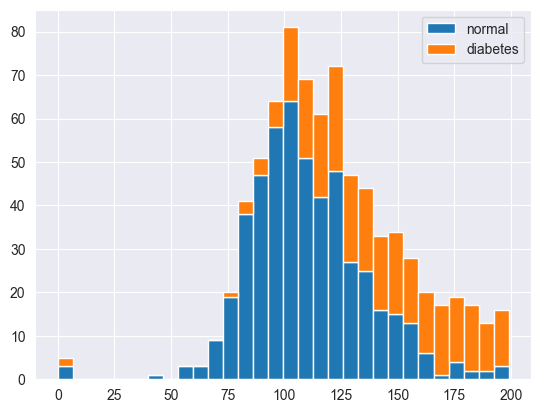

In [9]:

plt.hist(x=[df.plasma[df.diabetes==0],df.plasma[df.diabetes==1]],bins=30,
         histtype='barstacked',label=['normal','diabetes'])
plt.legend()

In [15]:

X = df.iloc[:,0:8] #세부 정보를 X로 지정합니다.
y= df.iloc[:,8] #당뇨병 여부를 y로 지정합니다.

In [16]:
from keras.models import Sequential
from keras.layers import Dense


In [17]:
model = Sequential()
model.add(Dense(12, input_dim=8,activation='relu',name='Dense_1'))
model.add(Dense(8,activation='relu',name='Dense_2'))
model.add(Dense(1,activation='sigmoid',name='Dense_3'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 12)                108       
                                                                 
 Dense_2 (Dense)             (None, 8)                 104       
                                                                 
 Dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
#모델 컴파일 합니다.
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
#모델을 실행합니다.
history = model.fit(X,y,epochs=100,batch_size=5)

Epoch 1/100
154/154 [==============================] - 2s 1ms/step - loss: 2.3472 - accuracy: 0.5885
Epoch 2/100
154/154 [==============================] - 0s 1ms/step - loss: 1.3746 - accuracy: 0.6328
Epoch 3/100
154/154 [==============================] - 0s 1ms/step - loss: 0.9895 - accuracy: 0.6432
Epoch 4/100
154/154 [==============================] - 0s 1ms/step - loss: 0.8241 - accuracy: 0.6523
Epoch 5/100
154/154 [==============================] - 0s 1ms/step - loss: 0.7538 - accuracy: 0.6523
Epoch 6/100
154/154 [==============================] - 0s 1ms/step - loss: 0.7132 - accuracy: 0.6510
Epoch 7/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6861 - accuracy: 0.6576
Epoch 8/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6747 - accuracy: 0.6419
Epoch 9/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6630 - accuracy: 0.6602
Epoch 10/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6368 - accura

In [21]:
print(model.predict(X))


24/24 [==============================] - 0s 1ms/step
[[5.82199335e-01]
 [1.51682764e-01]
 [4.64658618e-01]
 [1.73826888e-01]
 [6.11050308e-01]
 [2.99228281e-01]
 [3.01476717e-01]
 [5.60244977e-01]
 [8.84823024e-01]
 [4.49853718e-01]
 [1.64488345e-01]
 [5.88251054e-01]
 [3.42613369e-01]
 [9.96037841e-01]
 [6.56191051e-01]
 [5.50218165e-01]
 [1.83916390e-01]
 [2.81482160e-01]
 [5.53220689e-01]
 [2.41727129e-01]
 [2.03969166e-01]
 [2.73831725e-01]
 [5.88251054e-01]
 [2.71896958e-01]
 [4.08675760e-01]
 [4.89281416e-01]
 [5.88251054e-01]
 [2.35152289e-01]
 [4.80792105e-01]
 [1.07321225e-01]
 [5.02682805e-01]
 [4.14928168e-01]
 [2.47711778e-01]
 [3.27190980e-02]
 [5.55782318e-01]
 [4.56516385e-01]
 [5.88251054e-01]
 [5.30730307e-01]
 [1.56040341e-01]
 [5.14336109e-01]
 [4.22291309e-01]
 [3.63426477e-01]
 [8.61200988e-02]
 [3.84876341e-01]
 [4.64923173e-01]
 [5.88251054e-01]
 [5.88251054e-01]
 [5.43401986e-02]
 [6.06844902e-01]
 [5.77031136e-01]
 [1.61317065e-01]
 [3.25359017e-01]
 [1.3336986

In [22]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64
